In [1]:
# Import 3rd party packages

using DifferentialEquations, StochasticDiffEq, LinearAlgebra, Calculus, Discretizers, KernelDensity, Distributions
using JLD2, FileIO, DataFrames, LaTeXStrings;
using DelimitedFiles,CSV, Query;
using Plots;

In [2]:
#########################################
# Potential function (V): 
# (a*x^4)/4 - (b*x^3)/3 - (c*x^2)/2 - d*x
#########################################

#########################################
# Deterministic Dynamics f(x): 
# -a*x^3+b*x^2+c*x+d
#########################################

#########################################
# noise = linear additive noise
#########################################

#########################################
# Parameters governing function
# a1=0.7
# b1=0.0
# c1=1.0
# d1=0.1
#########################################

####################################
# Stationary points
# stable stat: x=-1.14168; x=1.24240
# saddle: x=-0.100715
####################################

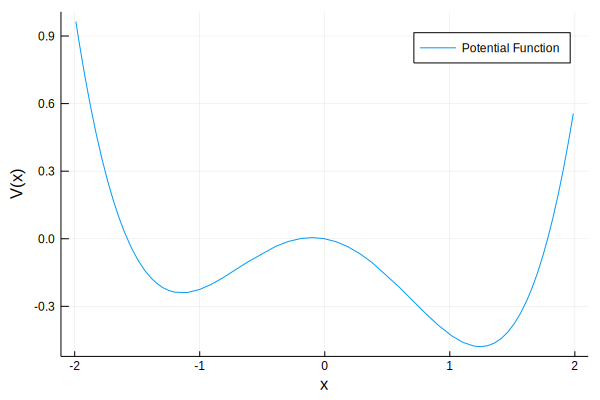

In [3]:
#########################################
# Potential function (V): 
# (a*x^4)/4 - (b*x^3)/3 - (c*x^2)/2 - d*x
#########################################

a1=0.7
b1=0.0
c1=1.0
d1=0.1

f(x) = (a1*x^4)/4 - (b1*x^3)/3 - (c1*x^2)/2 - d1*x

plot(f, -2.0, 2.0, label=("Potential Function"), ylabel=("V(x)"), xlabel=("x"))

In [4]:
##################################################
# ANALYTICAL STEADY STATE PROBABILITY DISTRIBUTION
##################################################

# Computed analytically using integration

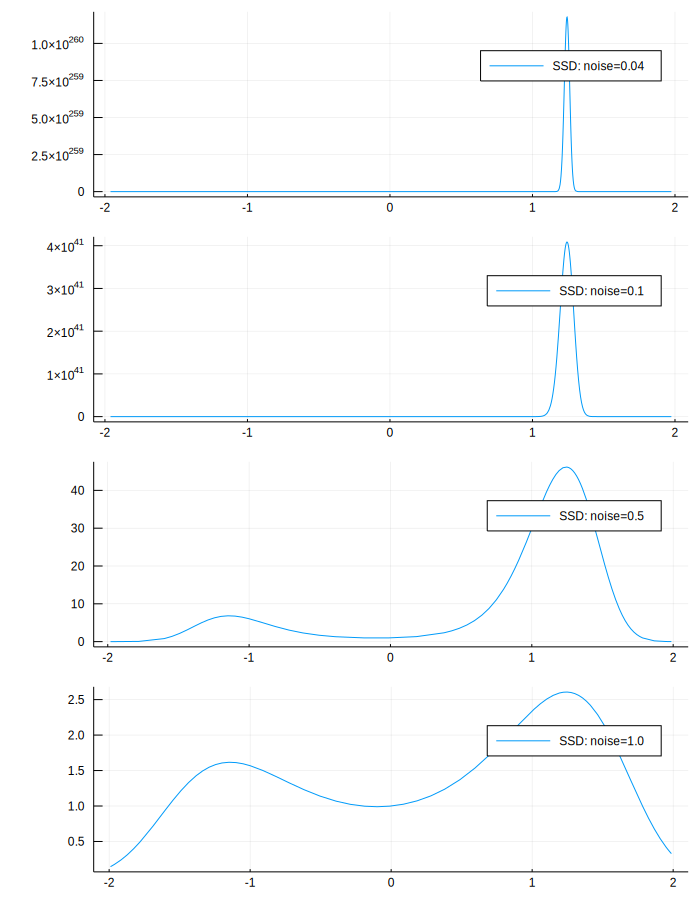

In [5]:
##################################################
# ADJUSTING NOISE LEVELS AND EFFECT ON SSD
##################################################

# Any level of noise lower than this doesn't plot as the solution seems undefined between -0.3 and 0.0?
α=0.04
f1_ssd_1(x) = exp((2/α^2)*((-a1*x^4)/4 + (b1*x^3)/3 + (c1*x^2)/2 + d1*x))
p1 = plot([f1_ssd_1],-2.0,2.0, label=("SSD: noise=$α"))

α=0.1
f1_ssd_2(x) = exp((2/α^2)*((-a1*x^4)/4 + (b1*x^3)/3 + (c1*x^2)/2 + d1*x))
p2 = plot([f1_ssd_2],-2.0,2.0,label=("SSD: noise=$α"))

α=0.5
f1_ssd_3(x) = exp((2/α^2)*((-a1*x^4)/4 + (b1*x^3)/3 + (c1*x^2)/2 + d1*x))
p3 = plot([f1_ssd_3],-2.0,2.0,label=("SSD: noise=$α"))

α=1.0
f1_ssd_4(x) = exp((2/α^2)*((-a1*x^4)/4 + (b1*x^3)/3 + (c1*x^2)/2 + d1*x))
p4 = plot([f1_ssd_4],-2.0,2.0,label=("SSD: noise=$α"))

plot(p1,p2,p3,p4,layout=(4,1),size=(700,900))

# When noise is very low we would expect the system to look more like the potential function, but somehow it does not?
# If I change d to equal 0.0 then we get exactly what I would expect
# So, does such a small change in d really have such a big impact on the SSPDs?
# Or is this once again a plotting/scale issue

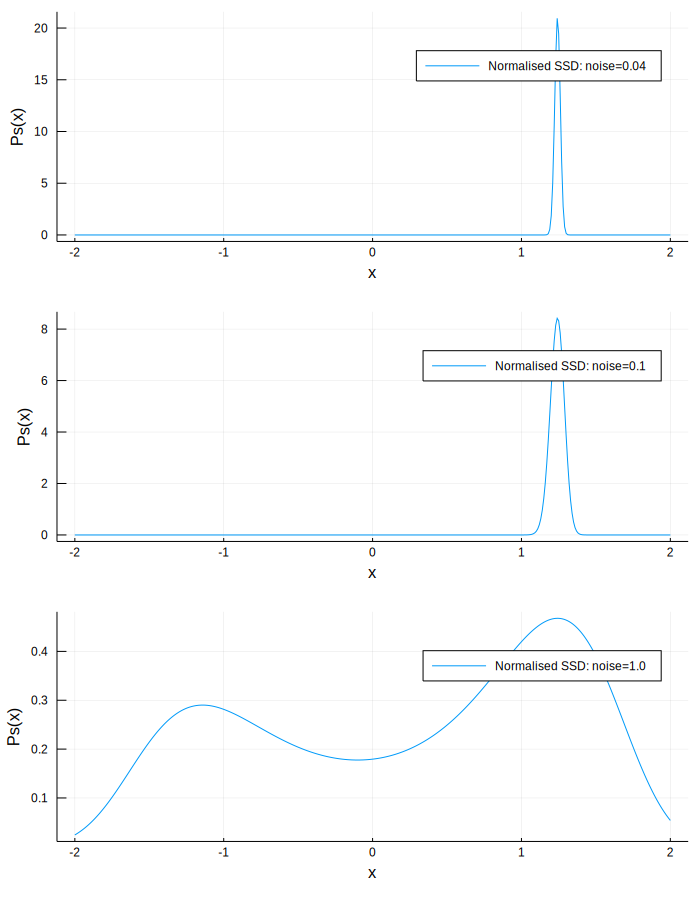

In [6]:
##################################################
# NORMALISE THE DISTRIBUTIONS
##################################################

# This seems like the normalisation works, but I still can't see anything for the negative side?

x = collect(-2.0:0.01:2.0)

α=0.04
f1_ssd_1_norm = f1_ssd_1.(x)
f1_ssd_1_normed = f1_ssd_1_norm./(0.01*sum(f1_ssd_1_norm)) 
p1_normed = plot(x,f1_ssd_1_normed,label=("Normalised SSD: noise=$α"),xlabel=("x"),ylabel=("Ps(x)"))

α=0.1
f1_ssd_2_norm = f1_ssd_2.(x)
f1_ssd_2_normed = f1_ssd_2_norm./(0.01*sum(f1_ssd_2_norm)) 
p2_normed = plot(x,f1_ssd_2_normed,label=("Normalised SSD: noise=$α"),xlabel=("x"),ylabel=("Ps(x)"))


# α=0.5
# f1_ssd_3_norm = f1_ssd_3.(x)
# f1_ssd_3_normed = f1_ssd_3_norm./(0.01*sum(f1_ssd_3_norm)) 
# p3_normed = plot(x,f1_ssd_3_normed,label=("Normalised SSD: noise=$α"),xlabel=("x"),ylabel=("Ps(x)"))

α=1.0
f1_ssd_4_norm = f1_ssd_4.(x)
f1_ssd_4_normed = f1_ssd_4_norm./(0.01*sum(f1_ssd_4_norm)) 
p4_normed = plot(x,f1_ssd_4_normed,label=("Normalised SSD: noise=$α"),xlabel=("x"),ylabel=("Ps(x)"))

final_ssd = plot(p1_normed,p2_normed,p4_normed,layout=(3,1),size=(700,900))

In [7]:
##################################################
# LANDSCAPE RECOVER FROM U = -LOG(Ps(X))
##################################################

# Computed analytically

In [8]:
##################################################
# ADJUSTING NOISE LEVELS AND EFFECT ON LANDSCAPE
##################################################

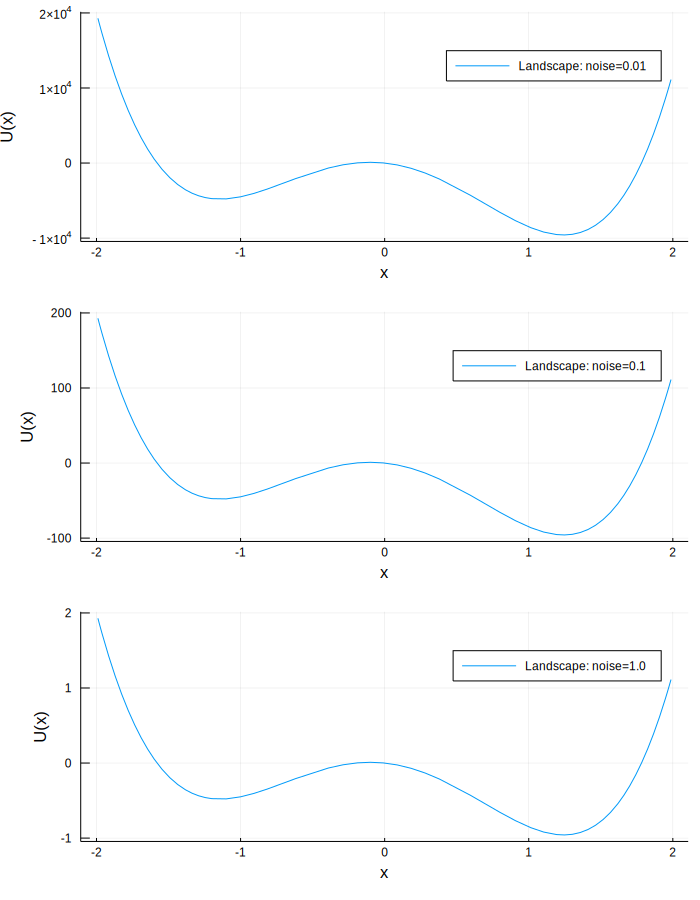

In [9]:
α=0.000001
f1_land_1(x) = -(2/α^2)*(-(a1*x^4)/4 + (b1*x^3)/3 + (c1*x^2)/2 + d1*x)
p1_land = plot([f1_land_1],-2.0,2.0, label="Landscape: noise=$α", xlabel=("x"),ylabel=("U(x)"))

α=0.01
f1_land_2(x) = -(2/α^2)*(-(a1*x^4)/4 + (b1*x^3)/3 + (c1*x^2)/2 + d1*x)
p2_land = plot([f1_land_2],-2.0,2.0, label="Landscape: noise=$α", xlabel=("x"),ylabel=("U(x)"))

α=0.1
f1_land_3(x) = -(2/α^2)*(-(a1*x^4)/4 + (b1*x^3)/3 + (c1*x^2)/2 + d1*x)
p3_land = plot([f1_land_3],-2.0,2.0, label="Landscape: noise=$α", xlabel=("x"),ylabel=("U(x)"))

α=1.0
f1_land_4(x) = -(2/α^2)*(-(a1*x^4)/4 + (b1*x^3)/3 + (c1*x^2)/2 + d1*x)
p4_land = plot([f1_land_4],-2.0,2.0, label="Landscape: noise=$α", xlabel=("x"),ylabel=("U(x)"))

# α=10.0
# f1_land_5(x) = -(2/α^2)*(-(a1*x^4)/4 + (b1*x^3)/3 + (c1*x^2)/2 + d1*x)
# p5_land = plot([f1_land_5],-2.0,2.0, label="noise=$α", xlabel=("x"),ylabel=("U(x)"))

final_land = plot(p2_land,p3_land,p4_land,layout=(3,1),size=(700,900))

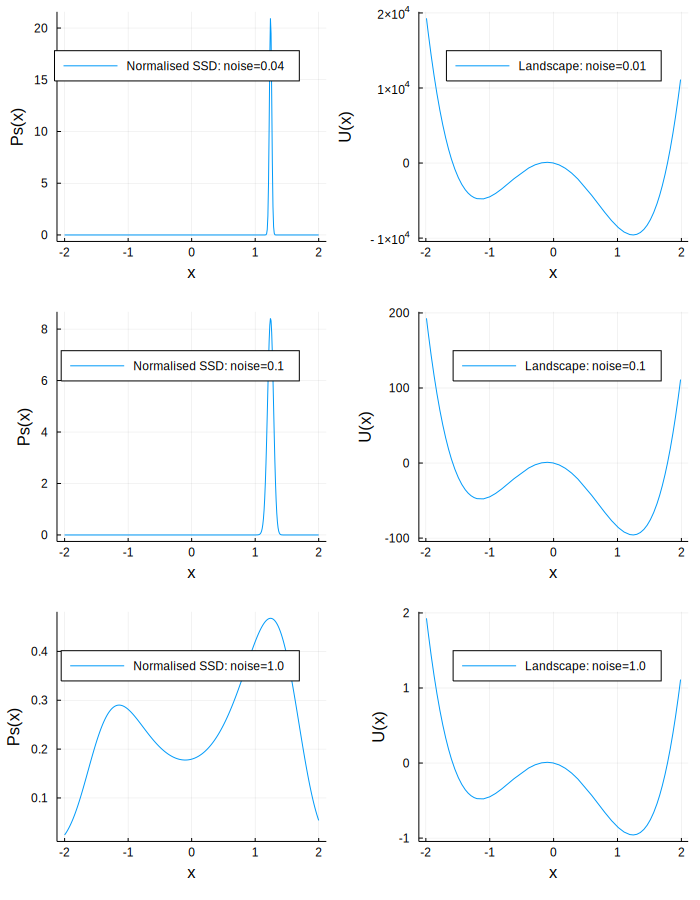

In [10]:
plot(final_ssd,final_land)

In [ ]:
##################################################
# CONCLUSION
##################################################

# Able to perfectly recover the original potential function by computing the landscape from -log(Ps(x))
# Valid for all levels of noise
# We can see that increased levels of noise affect only the depth of the landscape/ potential barriers

# I'm slightly confused as to why we can perfectly recover the potential function in the form of the landscape, but
# the SSPDs look so strange
# Does it have to do with a scale issue? And the landscape has a logarithm function?